<a href="https://colab.research.google.com/github/polina-da/Python-Projects/blob/main/Online_Store_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount("/content/drive")

zip_path = "/content/drive/MyDrive/Mate_homework/dataset.zip"

import zipfile

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall("/content/extracted")
    print(zip_ref.namelist())

Mounted at /content/drive
['13. Final project/countries.csv', '13. Final project/products.csv', '13. Final project/events.csv']


In [ ]:
#first 5 rows of "countries"
df_countries = pd.read_csv("/content/extracted/13. Final project/countries.csv")
df_countries.head()

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


У таблиці міститься інформація про назву країни, регіон її розташування, субрегіон, а також їхні міжнародні абревіатури.

In [ ]:
#first 5 rows of "products"
df_products = pd.read_csv("/content/extracted/13. Final project/products.csv")
df_products.head()

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


У таблиці **products** відображена інформація про тип продукту і його id.

In [ ]:
#first 5 rows of "events"
df_events = pd.read_csv("/content/extracted/13. Final project/events.csv")
df_events.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


Таблиця **events** містить детальну інформацію про замовлення: дата, час, код країни, де було зроблено замовлення, id замовленого продукту, його кількість, а також ціна за одиницю, витрати на одиницю товару, а також канал продажу.

Таблиці events i products об'єднуються за допомогою колонок product id та id. У свою чергу таблиці countries та events об'єднуються за кодом країни.

In [ ]:
#n/a values of "countries"
print(df_countries.isna().sum())

name          0
alpha-2       1
alpha-3       0
region        1
sub-region    1
dtype: int64


In [ ]:
#percentage of n/a values
print(df_countries.isna().sum() / df_countries.shape[0] * 100)

name          0.000000
alpha-2       0.401606
alpha-3       0.000000
region        0.401606
sub-region    0.401606
dtype: float64


In [ ]:
df_countries[df_countries.isnull().any(axis=1)]

,name,alpha-2,alpha-3,region,sub-region
8,Antarctica,AQ,ATA,NaN,NaN
153,Namibia,NaN,NAM,Africa,Sub-Saharan Africa


In [ ]:
#n/a values of "products"
print(df_products.isna().sum())

id           0
item_type    0
dtype: int64


In [ ]:
#n/a values of "events"
print(df_events.isna().sum())

Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code      82
Product ID         0
Sales Channel      0
Units Sold         2
Unit Price         0
Unit Cost          0
dtype: int64


In [ ]:
#percentage of n/a values
print(df_events.isna().sum() / df_events.shape[0] * 100)

Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      6.165414
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.150376
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64


У таблиці **countries** відсутні декілька значень, відсоткова частка кожного з яких становить 0.4%. Два з трьох n/a значень - це регіон і субрегіон Антарктики. Оскільки в колонці region представлені 5 можливих регіонів планети, Антарктика не відноситься до кожного з них, тому ці значення відсутні.

Таблиця **products** не має відсутніх значень.

У таблиці **events** відсутні 82 значення колонки country code та 2 значення units sold, які складають 6.16% та 0.15% від загального відповідно.

In [ ]:
#fill the gap in table "countries"
df_countries["alpha-2"] = df_countries["alpha-2"].fillna("NA")

In [ ]:
#check
print(df_countries.isna().sum())

name          0
alpha-2       0
alpha-3       0
region        1
sub-region    1
dtype: int64


In [ ]:
#remove n/a
df_countries = df_countries.dropna()

In [ ]:
#check
print(df_countries.isna().sum())

name          0
alpha-2       0
alpha-3       0
region        0
sub-region    0
dtype: int64


In [ ]:
#remove n/a
df_events = df_events.dropna()

In [ ]:
#check
print(df_events.isna().sum())

Order ID          0
Order Date        0
Ship Date         0
Order Priority    0
Country Code      0
Product ID        0
Sales Channel     0
Units Sold        0
Unit Price        0
Unit Cost         0
dtype: int64


У таблиці **countries** було видалено два рядки, враховуючи, що їхня відсоткова частка складає 0.4%, а також оскільки вони стосуються Антарктики, яка не відноситься до будь-якого регіону світу. Натомість було відсутнє значення alpha-2, яке стосується країни Намібія. Код країни знаходиться в загальнодоступній інформації, тому його можна відновити, що і було зроблено.

Таблиця **events** містила 82 пропущених значення в колонці Country Code. Їхня загальна відсоткова частка складала 6.16%, що є не є багато, тому було прийняте рішення їх видалити. Також у колонці Units Sold пропущені значення були видалені, тому що відсоткова частка складала 0.15%, що не суттєво впливає на загальну картину, і ми можемо обійтися без них.

In [ ]:
#general information of table "countries"
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        248 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     248 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 11.6+ KB


In [ ]:
#general information of table "products"
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


In [ ]:
#general information of table "events"
df_events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1246 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1246 non-null   int64  
 1   Order Date      1246 non-null   object 
 2   Ship Date       1246 non-null   object 
 3   Order Priority  1246 non-null   object 
 4   Country Code    1246 non-null   object 
 5   Product ID      1246 non-null   int64  
 6   Sales Channel   1246 non-null   object 
 7   Units Sold      1246 non-null   float64
 8   Unit Price      1246 non-null   float64
 9   Unit Cost       1246 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 107.1+ KB


In [ ]:
#transformation column Order Date to "datetime"
df_events["Order Date"] = pd.to_datetime(df_events["Order Date"])

In [ ]:
#transformation column Ship Date to "datetime"
df_events["Ship Date"] = pd.to_datetime(df_events["Ship Date"])

In [ ]:
#transformation column Units Sold to int
df_events["Units Sold"] = df_events["Units Sold"].astype(int)

In [ ]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1246 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1246 non-null   int64         
 1   Order Date      1246 non-null   datetime64[ns]
 2   Ship Date       1246 non-null   datetime64[ns]
 3   Order Priority  1246 non-null   object        
 4   Country Code    1246 non-null   object        
 5   Product ID      1246 non-null   int64         
 6   Sales Channel   1246 non-null   object        
 7   Units Sold      1246 non-null   int64         
 8   Unit Price      1246 non-null   float64       
 9   Unit Cost       1246 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(3)
memory usage: 107.1+ KB


У таблицях **countries** та **products** не було виявлено розбіжностей за типом даних. Натомість у таблиці **events** проведено перетворення типу даних у колонках Order Date і Ship Date на datetime, а також колонки Units Sold з типом float на int, оскільки кількість проданих одиниць — це цілі числа, а не дробові.

In [ ]:
#check for dublicates
df_countries.duplicated().sum()

np.int64(0)

In [ ]:
#check for dublicates
df_products.duplicated().sum()

np.int64(0)

In [ ]:
#check for dublicates
df_events.duplicated().sum()

np.int64(0)

Дублікатів у таблицях не виявлено.

In [ ]:
df_events.describe()

,Order ID,Order Date,Ship Date,Product ID,Units Sold,Unit Price,Unit Cost
count,1.246000e+03,1246,1246,1246.000000,1246.000000,1246.000000,1246.000000
mean,5.432231e+08,2013-10-11 14:45:15.890850816,2013-11-05 11:46:07.897271296,5756.146067,4953.186998,264.203387,186.310088
min,1.006406e+08,2010-01-01 00:00:00,2010-01-10 00:00:00,1270.000000,2.000000,9.330000,6.920000
25%,3.237987e+08,2011-12-09 18:00:00,2011-12-31 12:00:00,2455.000000,2349.250000,81.730000,35.840000
50%,5.438407e+08,2013-10-14 00:00:00,2013-11-03 00:00:00,5988.000000,4980.000000,154.060000,97.440000
75%,7.539619e+08,2015-09-01 12:00:00,2015-10-07 18:00:00,8293.000000,7477.000000,433.372500,263.330000
max,9.998797e+08,2017-07-22 00:00:00,2017-08-31 00:00:00,8969.000000,9999.000000,668.270000,524.960000
std,2.573524e+08,NaN,NaN,2827.558739,2915.825155,216.592937,175.503652


In [ ]:
df_events[df_events["Units Sold"] == 9999]

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
424,387098824,2013-12-23,2014-01-04,H,GBR,3127,Offline,9999,81.73,56.67


Аномалій даних виявлено не було. Була підозра, що max Units Sold - це помилка, адже число виглядало дивно, але це було перевірено.

In [ ]:
#merge tables
df = df_events.merge(df_products, left_on="Product ID", right_on="id", how="left")
df = df.merge(df_countries, left_on="Country Code", right_on="alpha-3", how="left")

In [ ]:
#first 5 rows of dataframe
df.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,id,item_type,name,alpha-2,alpha-3,region,sub-region
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650,205.70,117.11,2103,Cereal,Norway,NO,NOR,Europe,Northern Europe
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993,205.70,117.11,2103,Cereal,Serbia,RS,SRB,Europe,Southern Europe
2,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171,109.28,35.84,2455,Clothes,Montenegro,ME,MNE,Europe,Southern Europe
3,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648,47.45,31.79,1270,Beverages,Serbia,RS,SRB,Europe,Southern Europe
4,103450715,2015-03-15,2015-04-18,H,SVK,8681,Online,2220,651.21,524.96,8681,Office Supplies,Slovakia,SK,SVK,Europe,Eastern Europe


In [ ]:
#remove some columns
df.drop(["id", "Country Code", "alpha-2", "alpha-3"], axis=1, inplace=True)


In [ ]:
#remove some columns
df.drop("Order ID", axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order Date      1246 non-null   datetime64[ns]
 1   Ship Date       1246 non-null   datetime64[ns]
 2   Order Priority  1246 non-null   object        
 3   Product ID      1246 non-null   int64         
 4   Sales Channel   1246 non-null   object        
 5   Units Sold      1246 non-null   int64         
 6   Unit Price      1246 non-null   float64       
 7   Unit Cost       1246 non-null   float64       
 8   item_type       1246 non-null   object        
 9   name            1246 non-null   object        
 10  region          1246 non-null   object        
 11  sub-region      1246 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(6)
memory usage: 116.9+ KB


In [ ]:
#rename columns
df.rename(columns={
    "item_type": "Product Type",
    "name": "Country",
    "region": "Region",
    "sub-region": "Sub Region"
}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order Date      1246 non-null   datetime64[ns]
 1   Ship Date       1246 non-null   datetime64[ns]
 2   Order Priority  1246 non-null   object        
 3   Product ID      1246 non-null   int64         
 4   Sales Channel   1246 non-null   object        
 5   Units Sold      1246 non-null   int64         
 6   Unit Price      1246 non-null   float64       
 7   Unit Cost       1246 non-null   float64       
 8   Product Type    1246 non-null   object        
 9   Country         1246 non-null   object        
 10  Region          1246 non-null   object        
 11  Sub Region      1246 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(6)
memory usage: 116.9+ KB


In [ ]:
#number of orders
orders_count = df.shape[0]
print(f"Number of orders: {orders_count}")

Number of orders: 1246


In [ ]:
#total revenue
total_revenue = df["Units Sold"] * df["Unit Price"]
total_revenue = total_revenue.sum()
print(f"Total revenue: {total_revenue}")

Total revenue: 1598983761.26


In [ ]:
#total profit
total_profit = (df["Unit Price"] - df["Unit Cost"]) * df["Units Sold"]
total_profit = total_profit.sum()
print(f"Total profit: {total_profit}")

Total profit: 473709035.06


In [ ]:
#total cost
total_cost = df["Unit Cost"] * df["Units Sold"]
total_cost = total_cost.sum()
print(f"Total cost: {total_cost}")

Total cost: 1125274726.1999998


In [ ]:
#number of covered countries
number_of_countries = df["Country"].unique().shape[0]
print(f"Number of countries: {number_of_countries}")

Number of countries: 45


In [ ]:
#covered regions
unique_region = df["Region"].unique()
print( f"Regions: {unique_region}")

Regions: ['Europe' 'Asia']


In [ ]:
#average shipping time
average_shipping_time = df["Ship Date"] - df["Order Date"]
average_shipping_time = average_shipping_time.mean()
print(f"Average shipping time: {average_shipping_time.days} days")

Average shipping time: 24 days


In [ ]:
#number of orders by category
orders_by_category = df.groupby("Product Type").size()
orders_by_category

,0
Product Type,
Baby Food,105
Beverages,113
Cereal,101
Clothes,102
Cosmetics,108
Fruits,103
Household,91
Meat,102
Office Supplies,113


# Висновок щодо загальних метрик
*   Загальна кількість замовлень компанії скаладає 1246.
*   Загальний дохід склав 1598983761.26.
*   Загальний прибуток - 473709035.06.
*   Охоплено 45 країн.
*   Охоплено два регіони: Європа та Азія.
*   Середній час доставки складає 24 дні.
*   Розподіл кількісті замовлень на кожну категорію товару приблизно однаковий.










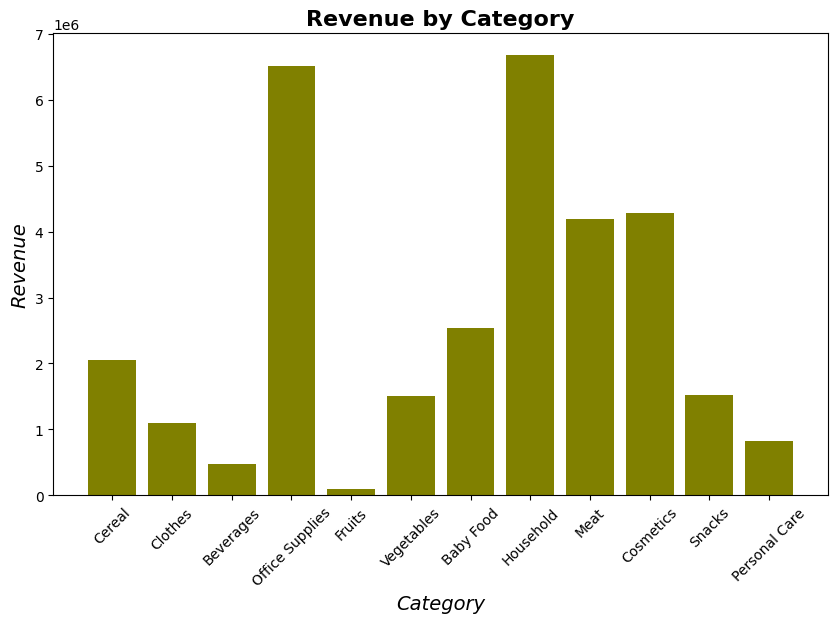

In [ ]:
plt.style.use("default")
plt.figure(figsize=(10, 6))

plt.bar(df["Product Type"], df["Units Sold"] * df["Unit Price"], color="olive")
plt.title("Revenue by Category", fontsize=16, fontweight="bold")
plt.xlabel("Category", fontsize=14, fontstyle="italic")
plt.ylabel("Revenue", fontsize=14, fontstyle="italic")
plt.xticks(rotation=45)
plt.show()

Найбільше доходу приносять категорії Office Supplies та Household. Найменшу кількість доходу - Fruits.

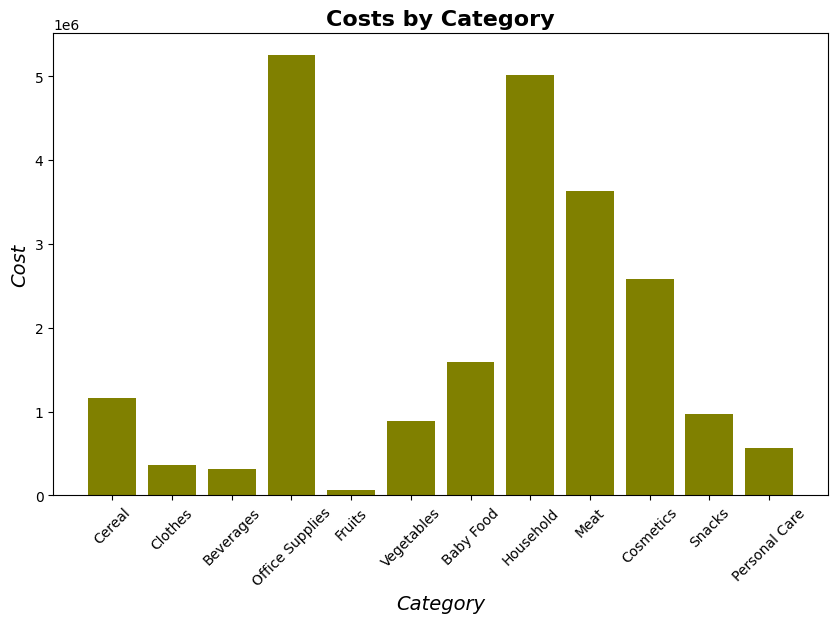

In [ ]:
plt.style.use("default")
plt.figure(figsize=(10, 6))

plt.bar(df["Product Type"], df["Units Sold"] * df["Unit Cost"], color="olive")
plt.title("Costs by Category", fontsize=16, fontweight="bold")
plt.xlabel("Category", fontsize=14, fontstyle="italic")
plt.ylabel("Cost", fontsize=14, fontstyle="italic")
plt.xticks(rotation=45)
plt.show()

Найбільше витрат припадає на категорії Office Supplies та Household. Найменше на категорію Fruits.

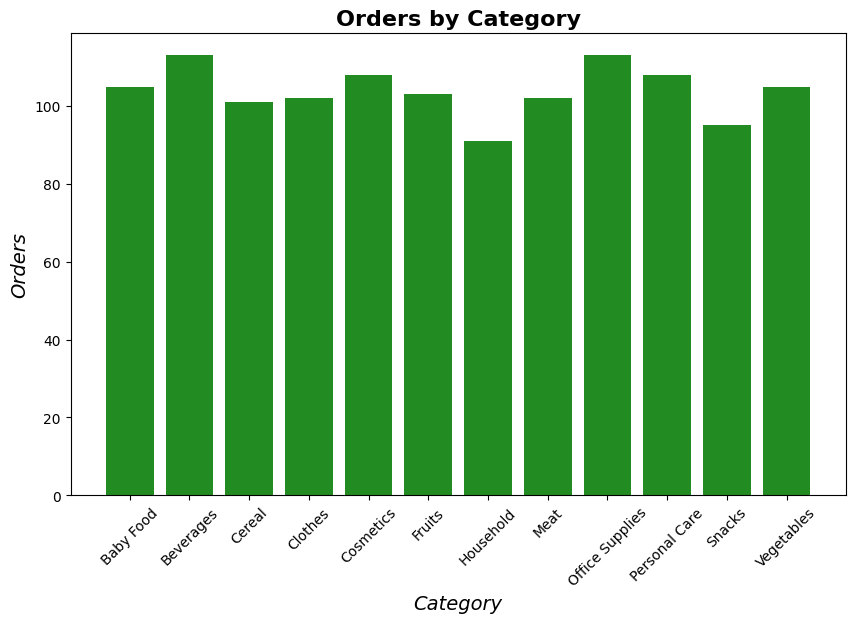

In [ ]:
plt.style.use("default")
plt.figure(figsize=(10, 6))

bars = plt.bar(orders_by_category.index, orders_by_category.values, color="forestgreen")
plt.title("Orders by Category", fontsize=16, fontweight="bold")
plt.xlabel("Category", fontsize=14, fontstyle="italic")
plt.ylabel("Orders", fontsize=14, fontstyle="italic")
plt.xticks(rotation=45)
plt.show()

Кількість замовлень розподілена практично рівномірно між категоріями. Але найбільш популярними є категорії Beverages та Office Supplies.

In [ ]:
df["Profit"] = (df["Unit Price"] - df["Unit Cost"]) * df["Units Sold"]

In [ ]:
df["Revenue"] = df["Units Sold"] * df["Unit Price"]
df_sorted = df.sort_values("Revenue", ascending=False)

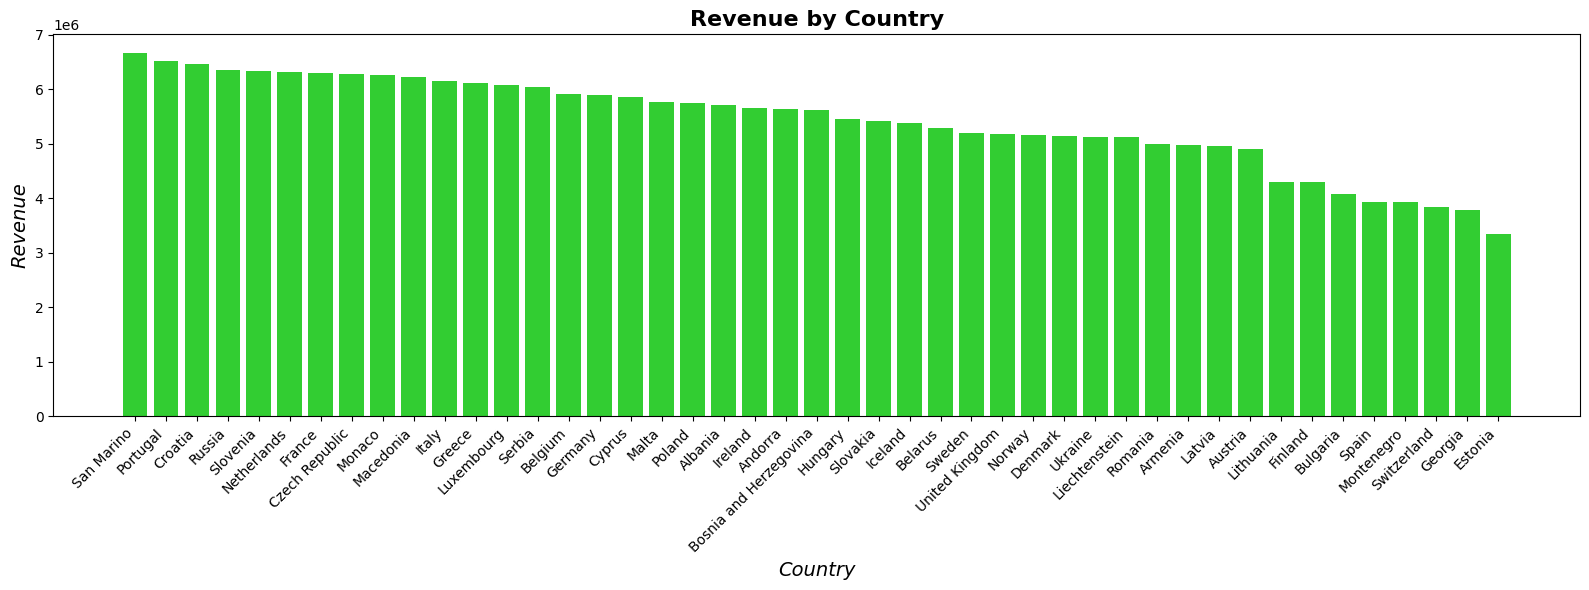

In [ ]:
plt.style.use("default")
plt.figure(figsize=(16, 6))

plt.bar(df_sorted["Country"], df_sorted["Revenue"], color="limegreen")
plt.title("Revenue by Country", fontsize=16, fontweight="bold")
plt.xlabel("Country", fontsize=14, fontstyle="italic")
plt.ylabel("Revenue", fontsize=14, fontstyle="italic")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Найбільше доходу приносять країни Сан-Марино, Португалія та Хорватія. Найменшу кількість доходу компанії приносить Естонія.

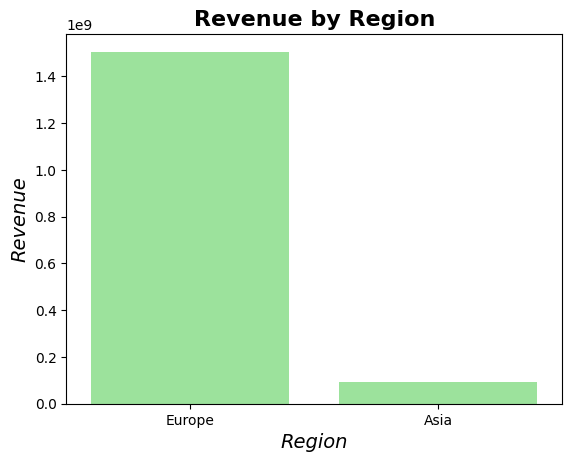

In [ ]:
sns.barplot(data=df, x="Region", y="Revenue", estimator=np.sum, errorbar=None, color="lightgreen")
plt.title("Revenue by Region", fontsize=16, fontweight="bold")
plt.xlabel("Region", fontsize=14, fontstyle="italic")
plt.ylabel("Revenue", fontsize=14, fontstyle="italic")
plt.show()

Левову частку доходу приносить регіон Європа.

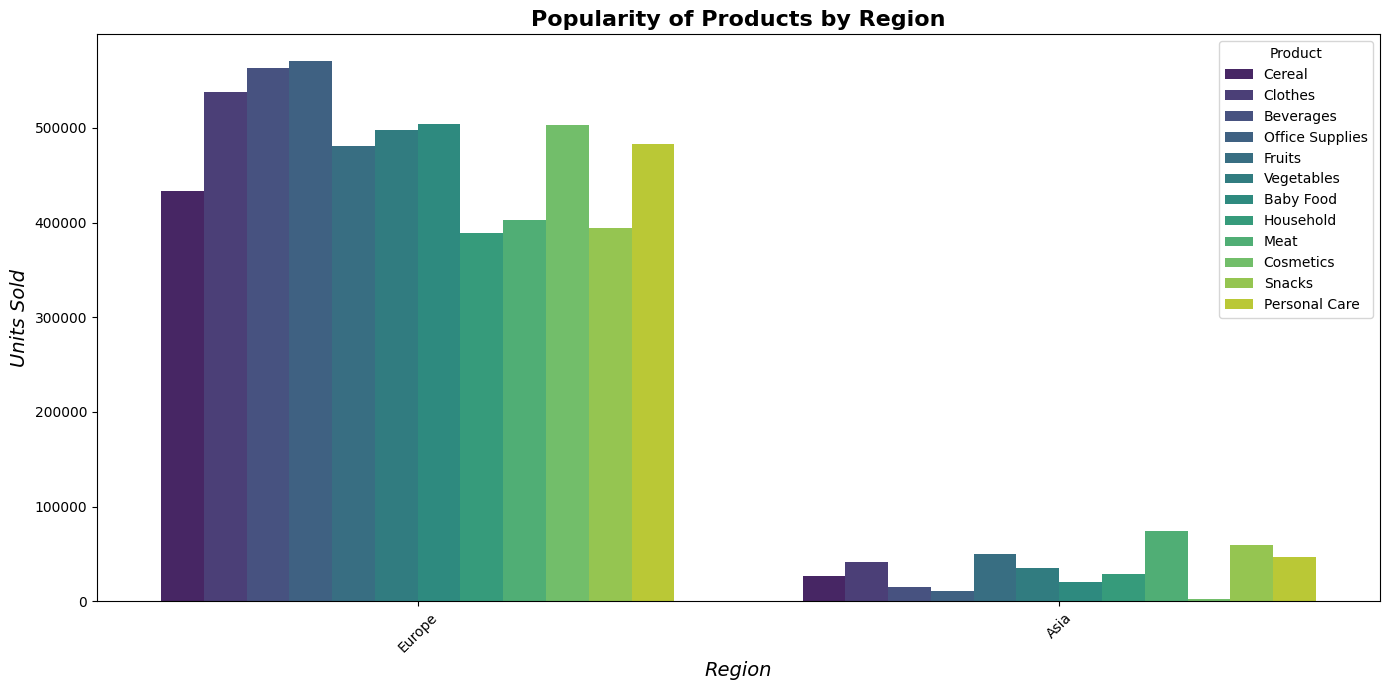

In [ ]:
plt.figure(figsize=(14, 7))
sns.barplot(data=df, x="Region", y="Units Sold", hue="Product Type",  estimator=sum, errorbar=("ci", False), palette="viridis")

plt.title("Popularity of Products by Region", fontsize=16, fontweight="bold")
plt.xlabel("Region", fontsize=14, fontstyle="italic")
plt.ylabel("Units Sold", fontsize=14, fontstyle="italic")
plt.xticks(rotation=45)
plt.legend(title="Product")
plt.tight_layout()
plt.show()

Найбільш продавананими продуктами в Європі є товари категорії Office Supplies. В Азії це продукти категорії Meat.

In [ ]:
df["Sales Channel"] = (df["Sales Channel"].str.strip().str.title())

In [ ]:
df["Sales Channel"].unique()

array(['Online', 'Offline'], dtype=object)

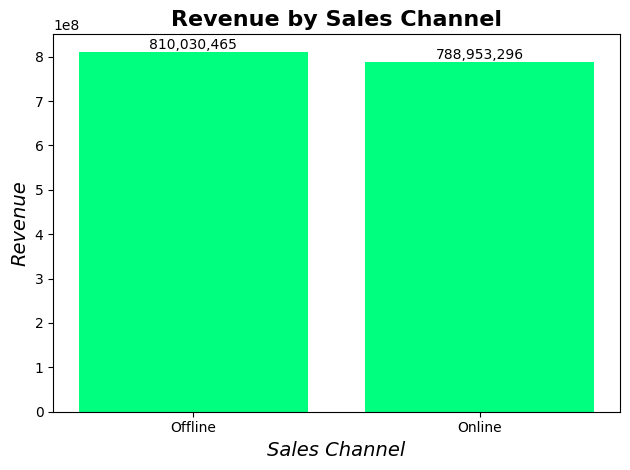

In [ ]:
group_sales_channel = df.groupby("Sales Channel")["Revenue"].sum().reset_index()
plt.style.use("default")

bars = plt.bar(group_sales_channel["Sales Channel"], group_sales_channel["Revenue"], color="springgreen")
plt.title("Revenue by Sales Channel", fontsize=16, fontweight="bold")
plt.xlabel("Sales Channel", fontsize=14, fontstyle="italic")
plt.ylabel("Revenue", fontsize=14, fontstyle="italic")
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height * 1.0,
        f"{height:,.0f}",
        ha="center",
        va="bottom",
        fontsize=10)

plt.tight_layout()
plt.show()

Дохід з каналів продажу майже рівний, сильного перепаду в одну сторону немає, однак все-таки більший з Offline.

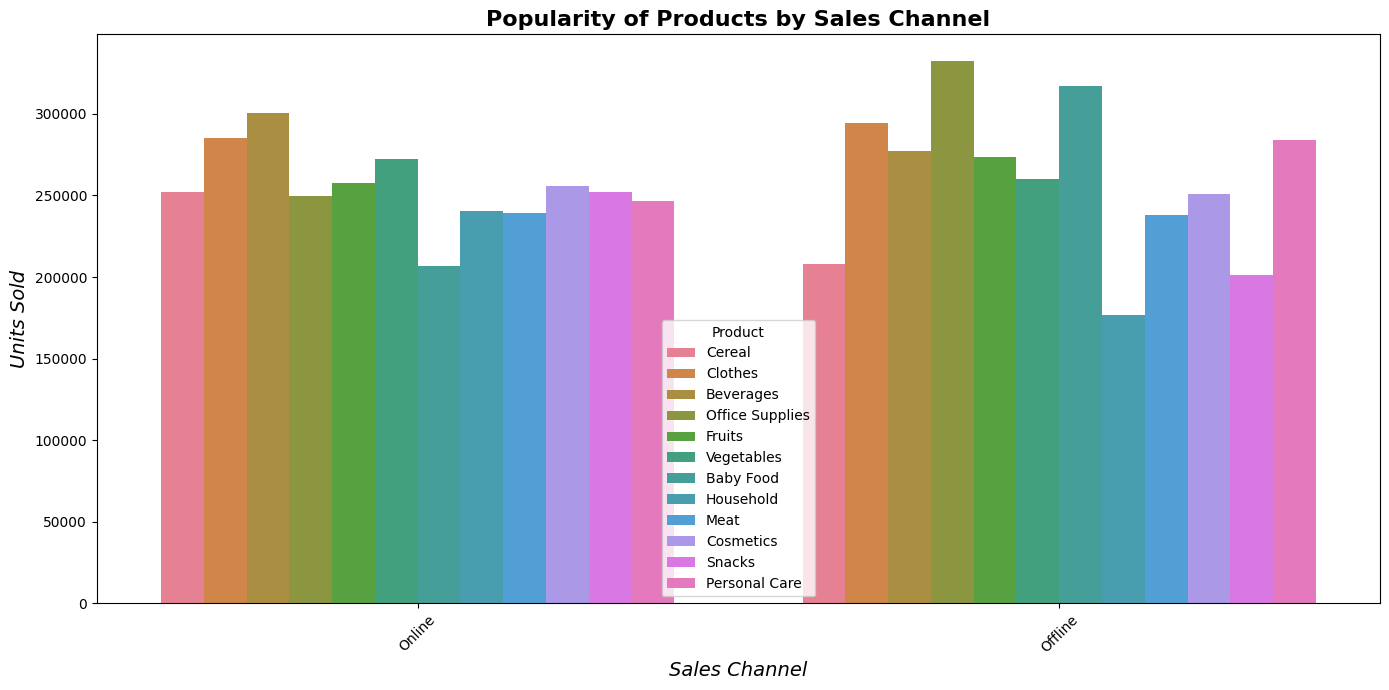

In [ ]:
plt.figure(figsize=(14, 7))
sns.barplot(data=df, x="Sales Channel", y="Units Sold", hue="Product Type",  estimator=sum, errorbar=("ci", False), palette="husl")

plt.title("Popularity of Products by Sales Channel", fontsize=16, fontweight="bold")
plt.xlabel("Sales Channel", fontsize=14, fontstyle="italic")
plt.ylabel("Units Sold", fontsize=14, fontstyle="italic")
plt.xticks(rotation=45)
plt.legend(title="Product")
plt.tight_layout()
plt.show()

Найпопулярнішими товарами через канал продажу Online є продукти Beverages і Clothes. В Offline каналі продажу такими товарами є Office Supplies та Baby Food.

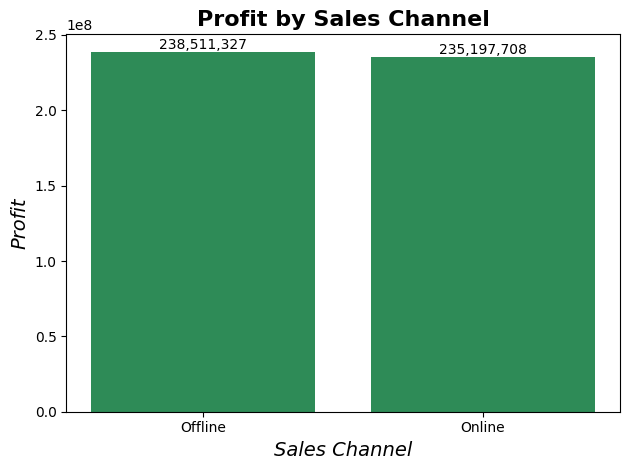

In [ ]:
profit_by_channel = df.groupby("Sales Channel")["Profit"].sum().reset_index()

bars = plt.bar(profit_by_channel["Sales Channel"], profit_by_channel["Profit"], color="seagreen")
plt.title("Profit by Sales Channel", fontsize=16, fontweight="bold")
plt.xlabel("Sales Channel", fontsize=14, fontstyle="italic")
plt.ylabel("Profit", fontsize=14, fontstyle="italic")
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height * 1.0,
        f"{height:,.0f}",
        ha="center",
        va="bottom",
        fontsize=10)

plt.tight_layout()
plt.show()

Прибуток майже однаковий у двох каналах продажу. Різниця між ними дуже невелика — близько 3 млн, що становить приблизно 1,3% від суми.

In [ ]:
df["Shipping Time"] = df["Ship Date"] - df["Order Date"]

In [ ]:
#calculate average shipping time by category
shipping_by_category = df.groupby("Product Type")["Shipping Time"].mean().reset_index()
shipping_by_category["Shipping Time"] = shipping_by_category["Shipping Time"].dt.days
shipping_by_category

,Product Type,Shipping Time
0,Baby Food,26
1,Beverages,23
2,Cereal,27
3,Clothes,23
4,Cosmetics,25
5,Fruits,24
6,Household,23
7,Meat,25
8,Office Supplies,27
9,Personal Care,20


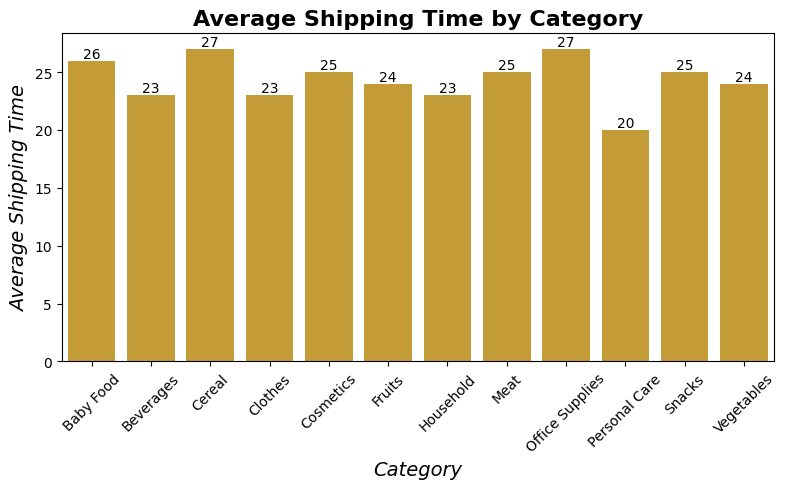

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=shipping_by_category, x="Product Type", y="Shipping Time", color="goldenrod")
plt.title("Average Shipping Time by Category", fontsize=16, fontweight="bold")
plt.ylabel("Average Shipping Time", fontsize=14, fontstyle="italic")
plt.xlabel("Category", fontsize=14, fontstyle="italic")
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", fontsize=10)

plt.tight_layout()
plt.show()

Найдовше у середньому відвантажуються товари категорій Cereal та Office Supplies (27 днів). Найшвидше відправляються продукти з категорії Personal Care (20 днів).

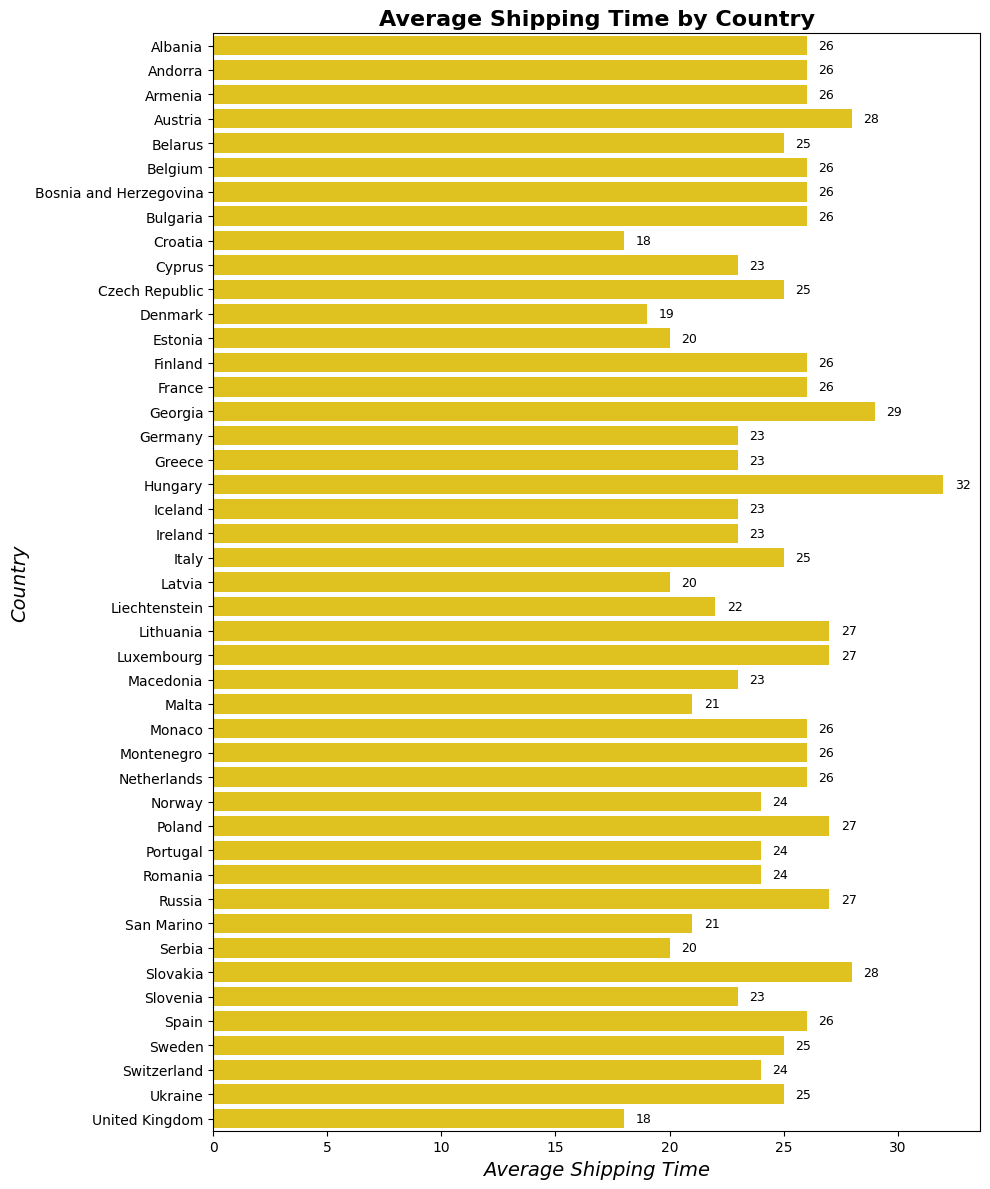

In [ ]:
shipping_by_country = df.groupby("Country")["Shipping Time"].mean().reset_index()
shipping_by_country["Shipping Time"] = shipping_by_country["Shipping Time"].dt.days
plt.figure(figsize=(10, 12))
ax = sns.barplot(data=shipping_by_country, y="Country", x="Shipping Time", color="gold")
plt.title("Average Shipping Time by Country", fontsize=16, fontweight="bold")
plt.xlabel("Average Shipping Time", fontsize=14, fontstyle="italic")
plt.ylabel("Country", fontsize=14, fontstyle="italic")
for bar in ax.patches:
    width = bar.get_width()
    ax.text(
        width + 0.5,
        bar.get_y() + bar.get_height() / 2,
        f"{width:.0f}",
        va='center',
        fontsize=9)
plt.tight_layout()
plt.show()


Найдовший середній час відвантаження товарів у розрізі країн складає 32 днів (Hungary), найменший - 18 днів (Croatia і United Kingdom).

/tmp/ipython-input-59-3678090203.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=shipping_by_region, x="Region", y="Shipping Time", palette="cubehelix")


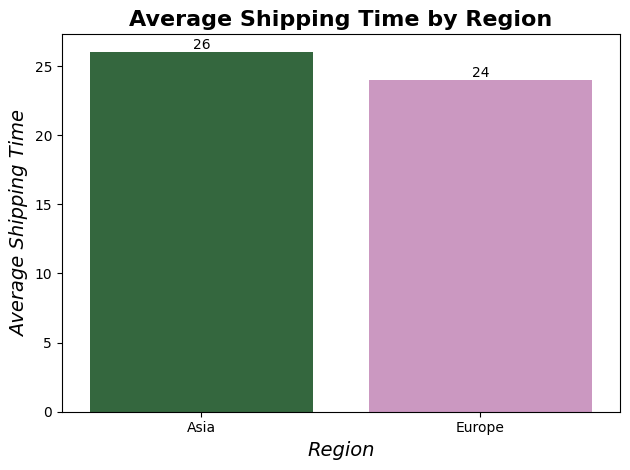

In [ ]:
shipping_by_region = df.groupby("Region")["Shipping Time"].mean().reset_index()
shipping_by_region["Shipping Time"] = shipping_by_region["Shipping Time"].dt.days
#plt.figure(figsize=(8, 5))
ax = sns.barplot(data=shipping_by_region, x="Region", y="Shipping Time", palette="cubehelix")
plt.title("Average Shipping Time by Region", fontsize=16, fontweight="bold")
plt.ylabel("Average Shipping Time", fontsize=14, fontstyle="italic")
plt.xlabel("Region", fontsize=14, fontstyle="italic")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", fontsize=10)

plt.tight_layout()
plt.show()

Довше відвантажуються товари регіону Азія (26 днів у середньому).

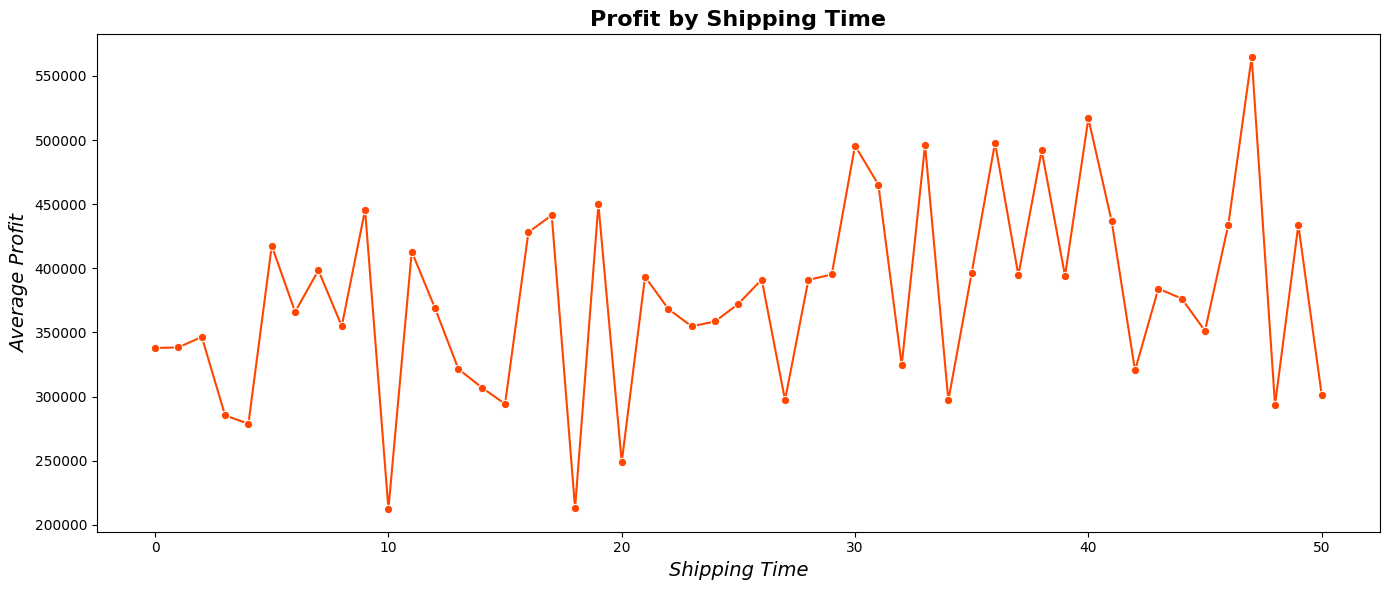

In [ ]:
df["Shipping Time"] = (df["Ship Date"] - df["Order Date"]).dt.days
profit_shipping_time = df.groupby("Shipping Time")["Profit"].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=profit_shipping_time, x="Shipping Time", y="Profit", marker="o", color="orangered")
plt.title("Profit by Shipping Time", fontsize=16, fontweight="bold")
plt.xlabel("Shipping Time", fontsize=14, fontstyle="italic")
plt.ylabel("Average Profit", fontsize=14, fontstyle="italic")
plt.tight_layout()
plt.show()

При зростанні кількісті днів доставки прибуток не зменшується. Навіть навпаки, при довшому часі доставки середній прибуток часто вищий, ніж при короткому.

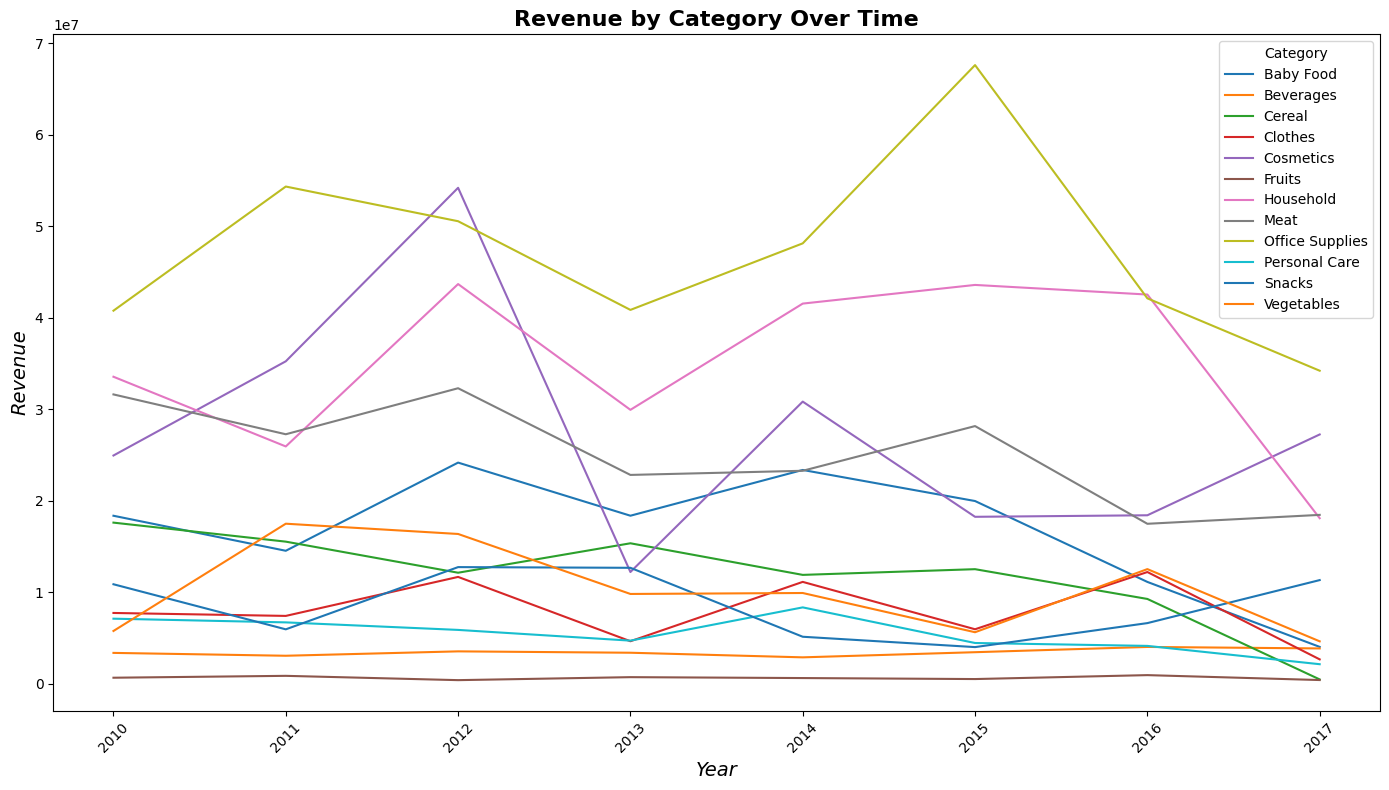

In [ ]:
df["Order Year"] = df["Order Date"].dt.year
revenue_by_category = df.groupby(["Product Type", "Order Year"])["Revenue"].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=revenue_by_category, x="Order Year", y="Revenue", hue="Product Type", palette="tab10")
plt.title("Revenue by Category Over Time", fontsize=16, fontweight="bold")
plt.xlabel("Year", fontsize=14, fontstyle="italic")
plt.ylabel("Revenue", fontsize=14, fontstyle="italic")
plt.legend(title="Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Доходи по категоріях товарів мають різну динаміку.
Office Supplies були ключовими у продажах за весь час.
У періоди 2012–2013 і 2016–2017 продажі йдуть на спад. Це може свідчити про зміну попиту або стратегію продажів.

In [ ]:
import plotly.express as px
revenue_by_country_year = df.groupby(["Country", "Order Year"])["Revenue"].sum().reset_index()

fig = px.choropleth(
    revenue_by_country_year,
    locations="Country",
    locationmode="country names",
    color="Revenue",
    animation_frame="Order Year",
    color_continuous_scale="Viridis",
    title="Revenue by Country Over Time",
)

fig.show()

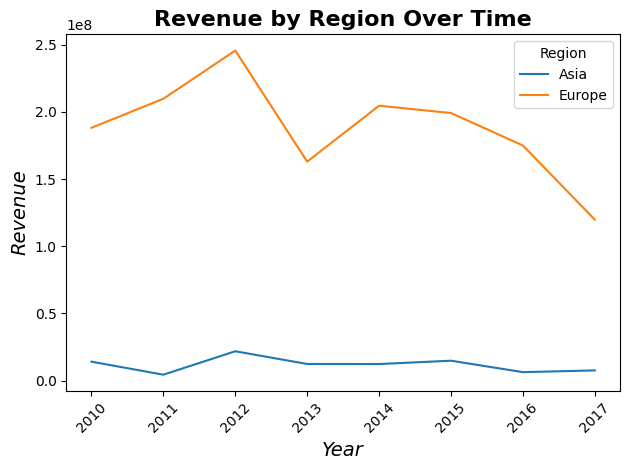

In [ ]:
revenue_by_region = df.groupby(["Region", "Order Year"])["Revenue"].sum().reset_index()

sns.lineplot(data=revenue_by_region, x="Order Year", y="Revenue", hue="Region")
plt.title("Revenue by Region Over Time", fontsize=16, fontweight="bold")
plt.xlabel("Year", fontsize=14, fontstyle="italic")
plt.ylabel("Revenue", fontsize=14, fontstyle="italic")
plt.legend(title="Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Для регіона Європа найприбутковішим став 2012 рік, як і для Азії. Найменш прибутковим для Європи є 2017 рік, а для регіону Азія - 2011.

In [ ]:
#using method "day name"
df["Weekday"] = df["Order Date"].dt.day_name()

In [ ]:
#grouping by weekday
weekday_revenue = df.groupby("Weekday")["Revenue"].sum().reset_index()
weekday_revenue

,Weekday,Revenue
0,Friday,2.436208e+08
1,Monday,2.591551e+08
2,Saturday,2.208222e+08
3,Sunday,2.224033e+08
4,Thursday,2.032473e+08
5,Tuesday,2.048675e+08
6,Wednesday,2.448676e+08


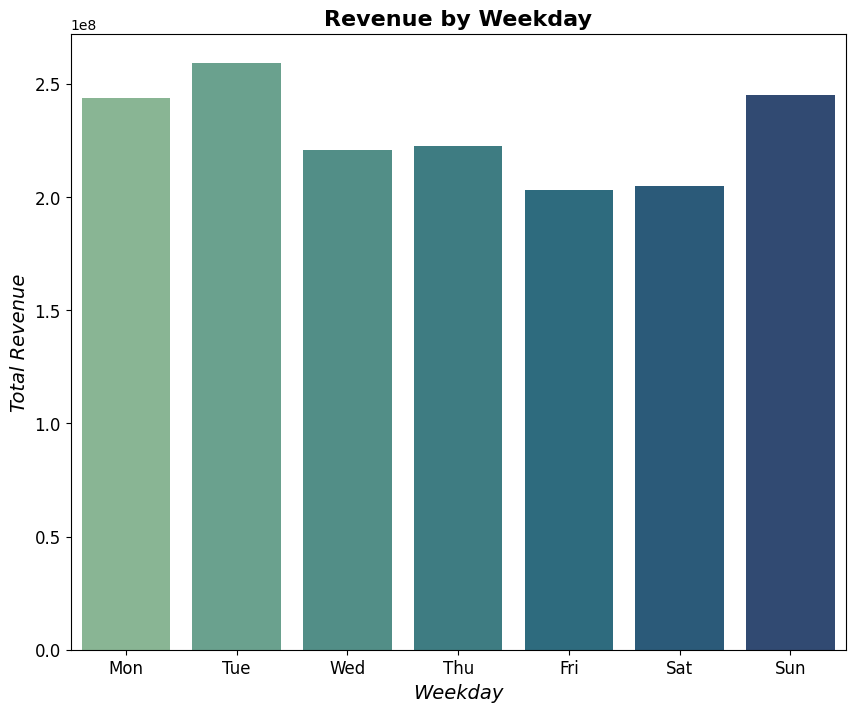

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(data=weekday_revenue, x="Weekday", y="Revenue", hue = "Weekday", palette="crest", legend=False)
plt.title("Revenue by Weekday", fontsize=16, fontweight="bold")
plt.xlabel("Weekday", fontsize=14, fontstyle="italic")
plt.ylabel("Total Revenue", fontsize=14, fontstyle="italic")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Розподіл продажів за днями тижня приблизно рівномірний. Великих перепадів у продажах не виявлено. Найприбутковішими днями тижня є Tuesday та Sunday.

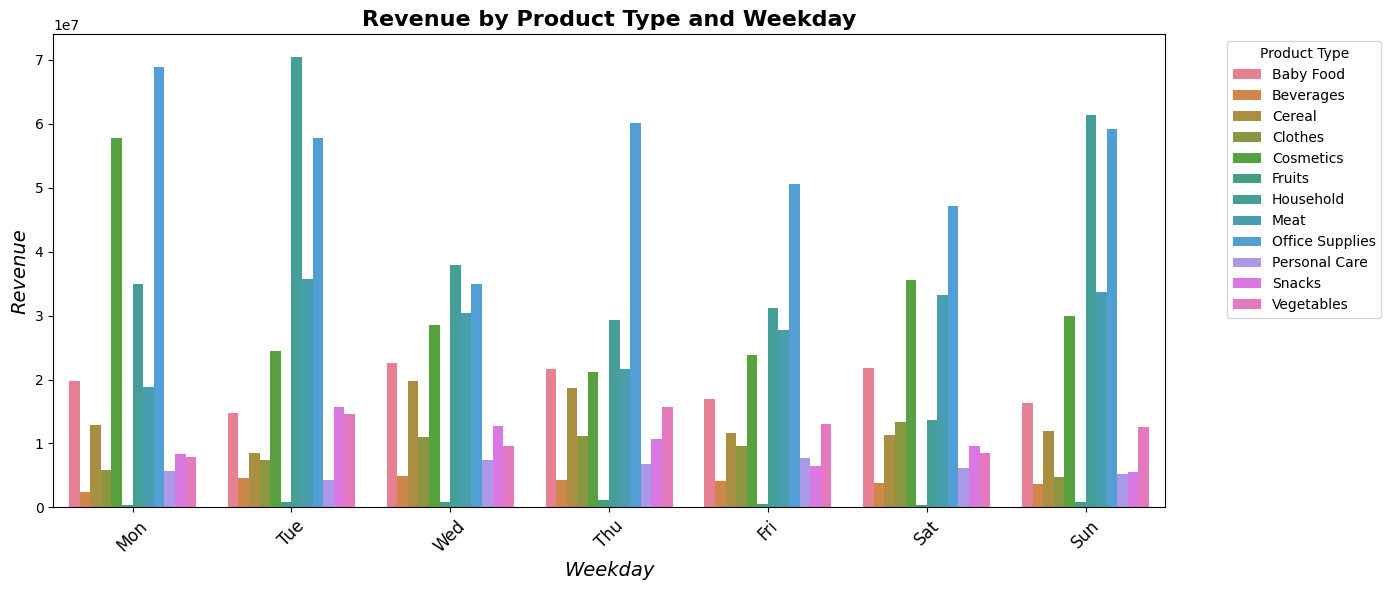

In [ ]:
#grouping by category and weekday
weekday_by_product = df.groupby(["Product Type", "Weekday"])["Revenue"].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=weekday_by_product, x="Weekday", y="Revenue", hue="Product Type"
)
plt.xticks(rotation=45)
plt.title("Revenue by Product Type and Weekday", fontsize=16, fontweight="bold")
plt.ylabel("Revenue", fontsize=14, fontstyle="italic")
plt.xlabel("Weekday", fontsize=14, fontstyle="italic")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], fontsize=12)
plt.legend(title="Product Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

Стабільно найвищий дохід майже щодня має категорія Office Supplies. Особливо у понеділок, четвер і неділю. Можна припустити, що це товари, які закупляють на початку робочого тижня, тому можна вважати сезоннім товаром. Категорію Fruits купляють найчастіше у вівторок та неділю. Присутня легка сезонність у тижні.

# Опис результатів аналізу

Був проведений комплексний аналіз даних з продажу різних найменувань категорій компанії. Було визначено, що загальна кількість замовлень становить 1246 одиниць, а загальний дохід компанії склав 1598983761, у той час як загальні витрати - 1125274726. Отже, загальний прибуток компанії від продажу складає 473709035.

Було охоплено 45 країн, серед яких лідером за кількістю прибутку компанії стала країна Сан-Марино. Варто зазначити, що продажі охопили Європу та Азію, де левова частка замовлень складають продажі саме з Європи. Отже, і загальний прибуток компанії з європейських продажів перевищує загальний прибуток з Азії.

Щодо каналів продажу потрібно звернути увагу, що прибуток, отриманий з офлайн-каналу лише трохи перевищує прибуток з онлайн-каналу. А популярність товарів практично однакова як через Online канал, так і через Offline. Тому, можна зробити висновок, що канал продажу, який лідирує, у нас відсутній. Обидва канали продажу важливі і прибуткові.

Перейдемо до інтервалу часу між замовленням та його відвантаженням. Середній час відвантаження товарів для Азії складає 26 днів, а для Європи - 24. Найбільший середній інтервал час у розрізі категорії потрібен для категорій Cereal та Office Supplies (27 днів), а найменший для категорії Personal Care (20 днів). У розрізі країн цей показник коливається в межах від 18 до 32 днів. Але він не впливає на загальний прибуток компанії, адже, як можна помітити у графіках, при зростанні кількісті днів доставки прибуток не зменшується. Навіть навпаки, при довшому часі доставки середній прибуток часто вищий, ніж при короткому.

На жаль, можна помітити, що за всі роки роботи компанії спостерігається тенденція спаду як прибутку, так і доходу. Найбільш прибутковий став 2012 рік, а найменш прибутковий - останній 2017 рік. Ця ж тенденція спостерігається для категорій і регіонів продажу.

Вихідні дні ніяк не впливають на кількість продажу, оскільки в усі дні тижня кількість замовленнь практично однакова, відповідно і кількість доходу і прибутку розподіляється рівномірно. Щодо сезонності товарів можна зробити висновок, що Office Supplies та Fruits мають легку сезонність, оскільки товари групи Office Supplies переважно купляють на початку робочого тижня, а товари категорії Fruits - у вихідні дні.